In [2]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [1]:

iris = datasets.load_iris()

data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print("Feature Data:\n", data.head()) 

data['target'] = iris.target
print("Target is:", iris.target[:5]) 

X = data.iloc[:, :-1] 
Y = data['target']  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


NameError: name 'datasets' is not defined

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)

clf.fit(X_train, Y_train)

predictions = clf.predict(X_test)
print("\nAccuracy:", accuracy_score(Y_test, predictions))

tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n")
print(tree_rules)



Accuracy: 0.9777777777777777

Decision Tree Rules:

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal length (cm) <= 5.15
|   |   |   |--- petal width (cm) <= 1.75
|   |   |   |   |--- sepal width (cm) <= 2.35
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  2.35
|   |   |   |   |   |--- petal length (cm) <= 5.05
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.05
|   |   |   |   |   |   |--- sepal length (cm) <= 6.15
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- sepal length (cm) >  6.15
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.75
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   | 

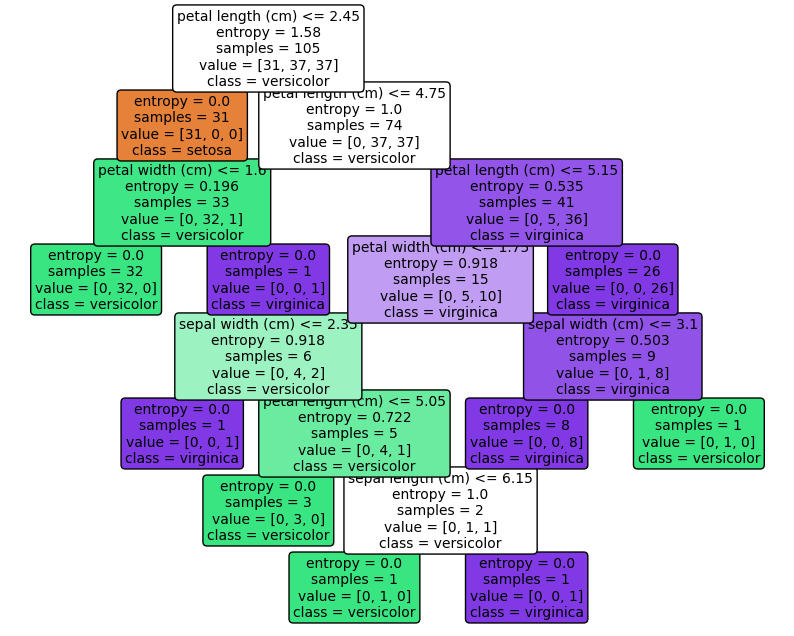


New sample: [[6.7, 3.0, 5.2, 2.3]]

Predicted Class for New Sample: virginica


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
plt.figure(figsize=(10, 8))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()

new_sample = [[6.7, 3.0, 5.2, 2.3]]  
print("\nNew sample:", new_sample)

predicted_class = clf.predict(new_sample)
print("\nPredicted Class for New Sample:", iris.target_names[predicted_class[0]])
